In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_original = pd.read_csv("data/US_Accidents_June20.csv")
print(df_original.columns)
print(len(df_original))
df_original.head()

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
3513617


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
import copy
df = copy.deepcopy(df_original)
print(df.columns)
print(len(df))
# df.dropna(thresh=3)
print(df.info())
print(df.columns[df.dtypes.values == np.dtype('bool')])

df.count(axis=0)

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
3513617
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     objec

ID                       3513617
Source                   3513617
TMC                      2478818
Severity                 3513617
Start_Time               3513617
End_Time                 3513617
Start_Lat                3513617
Start_Lng                3513617
End_Lat                  1034799
End_Lng                  1034799
Distance(mi)             3513617
Description              3513616
Number                   1250753
Street                   3513617
Side                     3513617
City                     3513505
County                   3513617
State                    3513617
Zipcode                  3512548
Country                  3513617
Timezone                 3509737
Airport_Code             3506859
Weather_Timestamp        3470294
Temperature(F)           3447885
Wind_Chill(F)            1645368
Humidity(%)              3443930
Pressure(in)             3457735
Visibility(mi)           3437761
Wind_Direction           3454743
Wind_Speed(mph)          3059008
Precipitat

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from IPython.display import display

flot = ['Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
bol = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop']

display(df.head())
df = df[flot+bol+['Severity']].dropna()
print(len(df))
df = df.head(1000000)
# display(df)
df.loc[df['Severity'].isin([1, 2]), 'Severity'] = 0
df.loc[df['Severity'].isin([3, 4]), 'Severity'] = 1

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


3033643


In [5]:
list(df.columns)

['Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Severity']

In [6]:
X = df.head(800000)[flot+bol]
y = df.head(800000)['Severity']

# SVM

In [ ]:
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X, y)
clf.score(df.tail(200000)[flot+bol], df.tail(200000)['Severity'])

In [ ]:
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0, scoring='accuracy')

In [ ]:
len(result.importances_mean)

In [ ]:
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(result.importances_mean)
tree_indices = np.arange(0, len(result.importances_mean)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.barh(tree_indices,
         result.importances_mean[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(np.array(list(df.columns))[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(result.importances_mean)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=np.array(list(df.columns))[perm_sorted_idx])
fig.tight_layout()
plt.show()

# Random Forest

#### Accuracy

In [7]:
clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [8]:
result = permutation_importance(clf, X, y, n_repeats=10, random_state=1)

In [10]:
perm_sorted_idx = result.importances_mean.argsort()

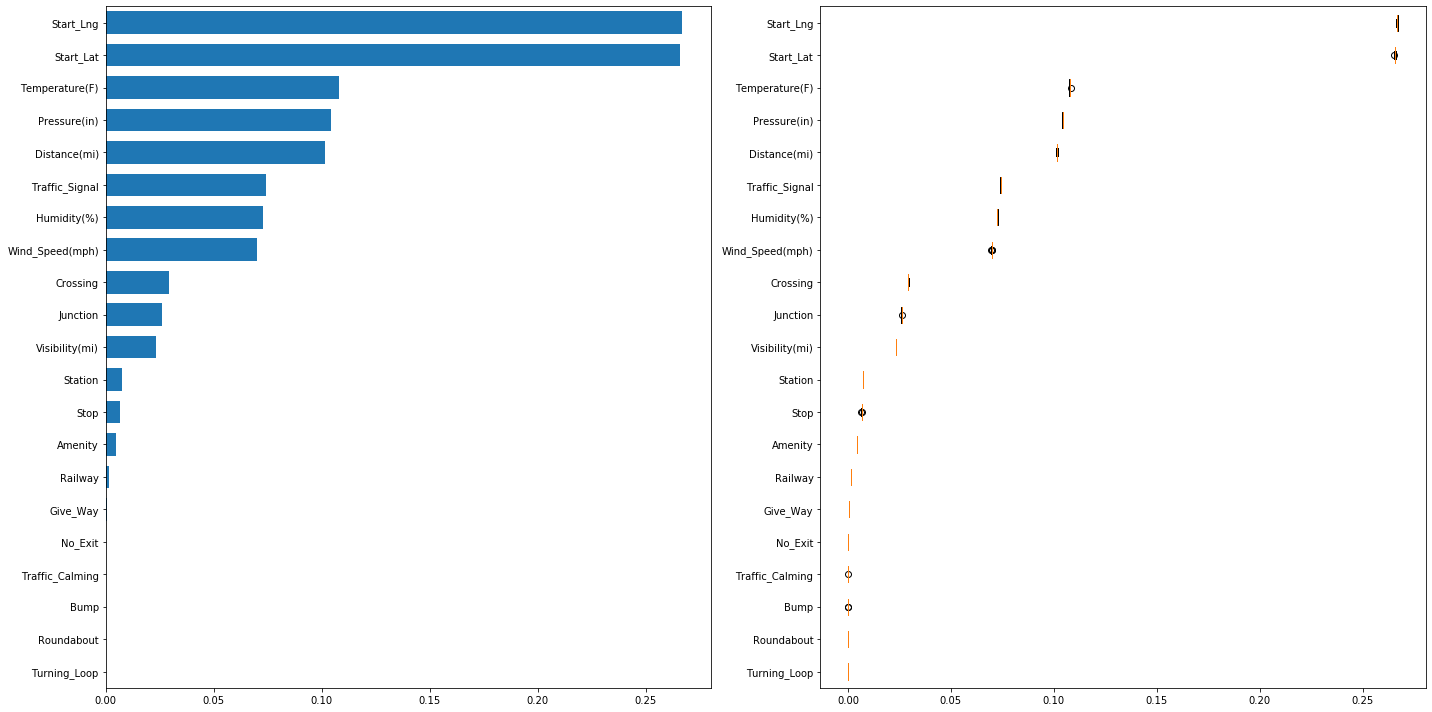

In [11]:
tree_importance_sorted_idx = np.argsort(result.importances_mean)
tree_indices = np.arange(0, len(result.importances_mean)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.barh(tree_indices,
         result.importances_mean[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(np.array(list(df.columns))[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(result.importances_mean)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=np.array(list(df.columns))[perm_sorted_idx])
fig.tight_layout()
plt.show()

#### F1

In [13]:
result_f1 = permutation_importance(clf, X, y, n_repeats=10, random_state=1, scoring='f1')

In [14]:
perm_sorted_idx = result_f1.importances_mean.argsort()

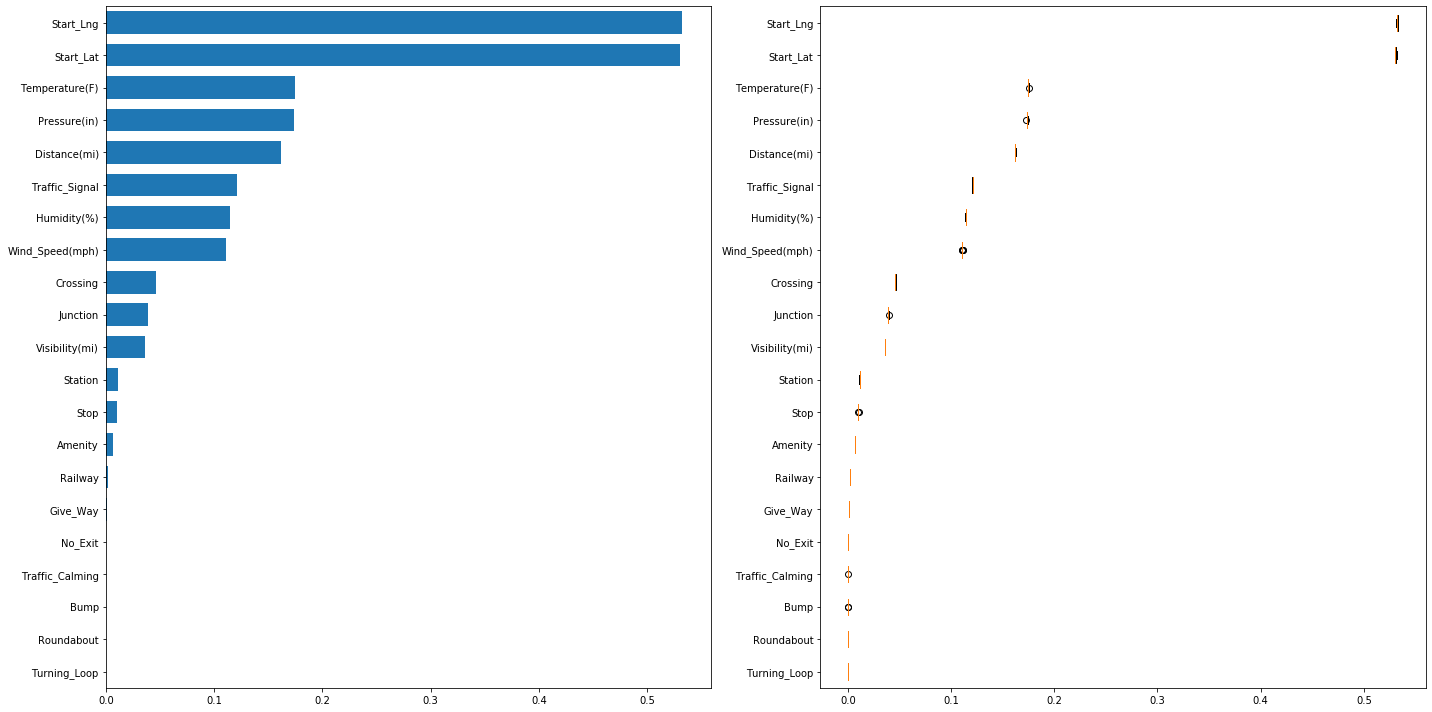

In [15]:
tree_importance_sorted_idx = np.argsort(result_f1.importances_mean)
tree_indices = np.arange(0, len(result_f1.importances_mean)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.barh(tree_indices,
         result_f1.importances_mean[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(np.array(list(df.columns))[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(result_f1.importances_mean)))
ax2.boxplot(result_f1.importances[perm_sorted_idx].T, vert=False,
            labels=np.array(list(df.columns))[perm_sorted_idx])
fig.tight_layout()
plt.show()